# Задача классификации

## 1. Выбор начальных условий

### Загрузка датасета

Для задачи классификации мною был выбран датасет с Kaggle для прогнозирования наличия у пациента диабета. Датасет содержит медицинские записи различных показателей, связанных со здоровьем пациента.

Ниже приведено подробное описание каждого столбца в наборе данных:

- **Pregnancies** - сколько раз пациентка была беременна.
- **Glucose** - концентрация глюкозы в плазме через 2 часа при пероральном тесте на толерантность к глюкозе.
- **BloodPressure** - Диастолическое артериальное давление (мм рт. ст.).
- **SkinThickness** - Толщина кожной складки трицепса (мм).
- **Insulin** - 2-часовой сывороточный инсулин (мю Ед/мл).
- **BMI** - индекс массы тела (вес в кг/(рост в м)^2).
- **DiabetesPedigreeFunction** - функция, которая оценивает вероятность диабета на основе семейного анамнеза.
- **Age** - Возраст пациента (лет).
- **Outcome** - переменная класса (0 или 1), где 1 означает наличие диабета, а 0 — отсутствие диабета.

In [187]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: cojihbilliko
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/lara311/diabetes-dataset-using-many-medical-metrics


100%|██████████| 8.92k/8.92k [00:00<00:00, 12.2MB/s]

In [2]:
import pandas as pd

raw_data = pd.read_csv('diabetes-dataset-using-many-medical-metrics/diabetes.csv')
raw_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


### Метрики

В качестве метрик в задаче классификации использовались accuracy и f1-score:
- accuracy = (TP + TN) / (TP + TN + FP + FN);
- f1-score = 2 * (presicion * recall) / (presicion + recall).

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import pandas as pd

In [117]:
def print_evaluation(y_test, y_pred):
    y_test = np.array(y_test)
    y_pred = np.array(y_pred)
    if np.issubdtype(y_pred.dtype, np.floating):
        threshold = 0.5
        y_pred = (y_pred >= threshold).astype(int)

    if np.issubdtype(y_test.dtype, np.floating):
        y_test = (y_test >= threshold).astype(int)

    print(f"Accuracy score: {accuracy_score(y_test, y_pred)}\n")
    print(classification_report(y_test, y_pred, zero_division=0))

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

def show_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    labels = ["Class 0", "Class 1"]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

## 2. Создание бейзлайна и оценка качества

Разделим исходные данные на обучающую и тестовую выборки

In [ ]:
raw_x = raw_data.drop('Outcome', axis=1)
raw_y = raw_data['Outcome']

raw_x_train, raw_x_test, raw_y_train, raw_y_test = train_test_split(raw_x, raw_y, test_size=0.2, random_state=42)

### Обучение моделей
#### KNN

In [25]:
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(raw_x_train,raw_y_train)

raw_y_pred = modelKNN.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred)

Accuracy score: 0.6493506493506493

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



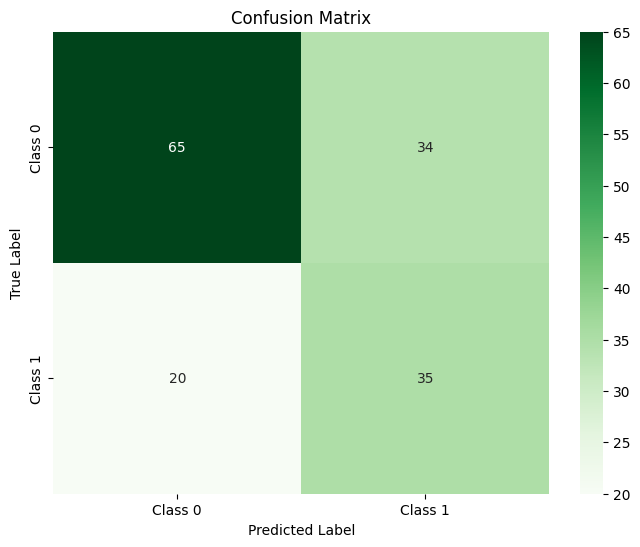

In [33]:
show_confusion_matrix(raw_y_test, raw_y_pred)

#### Логистическая регрессия

In [27]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
modelLogisticRegression = LogisticRegression(random_state=42, max_iter=100000)
modelLogisticRegression.fit(raw_x_train,raw_y_train)

raw_y_pred2 = modelLogisticRegression.predict(raw_x_test)
print("MSE score:", mean_squared_error(raw_y_test, raw_y_pred2))
print_evaluation(raw_y_test, raw_y_pred2)

MSE score: 0.2532467532467532
Accuracy score: 0.7467532467532467

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



#### Линейная регрессия

In [35]:
modelLinearRegression = LinearRegression()
modelLinearRegression.fit(raw_x_train,raw_y_train)

raw_y_pred3 = modelLinearRegression.predict(raw_x_test)
print("MSE score:", mean_squared_error(raw_y_test, raw_y_pred3))
print_evaluation(raw_y_test, raw_y_pred3)

MSE score: 0.17104527280850104
Accuracy score: 0.7597402597402597

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



#### Решающее дерево

In [30]:
from sklearn.tree import DecisionTreeClassifier

modelDecisionTree = DecisionTreeClassifier(random_state=42)
modelDecisionTree.fit(raw_x_train, raw_y_train)

raw_y_pred4 = modelDecisionTree.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred4)

Accuracy score: 0.7467532467532467

              precision    recall  f1-score   support

           0       0.83      0.76      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



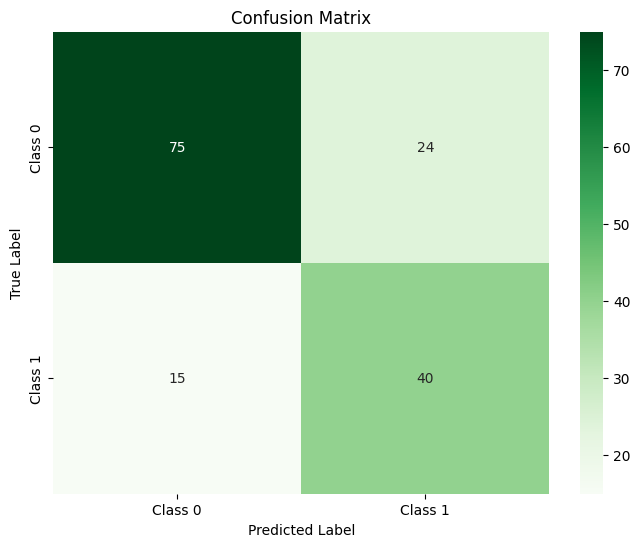

In [34]:
show_confusion_matrix(raw_y_test, raw_y_pred4)

#### Случайный лес

In [37]:
from sklearn.ensemble import RandomForestClassifier

modelRandomForest = RandomForestClassifier(n_estimators=100, random_state=42)
modelRandomForest.fit(raw_x_train, raw_y_train)

raw_y_pred5 = modelRandomForest.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred5)

Accuracy score: 0.7207792207792207

              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



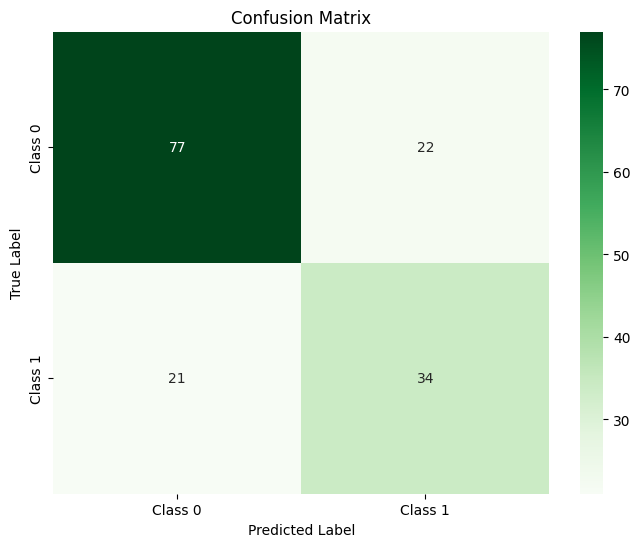

In [38]:
show_confusion_matrix(raw_y_test, raw_y_pred5)

#### Градиентный бустинг

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

modelGradientBoosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
modelGradientBoosting.fit(raw_x_train, raw_y_train)

raw_y_pred6 = modelGradientBoosting.predict(raw_x_test)
print_evaluation(raw_y_test, raw_y_pred6)

Accuracy score: 0.7402597402597403

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



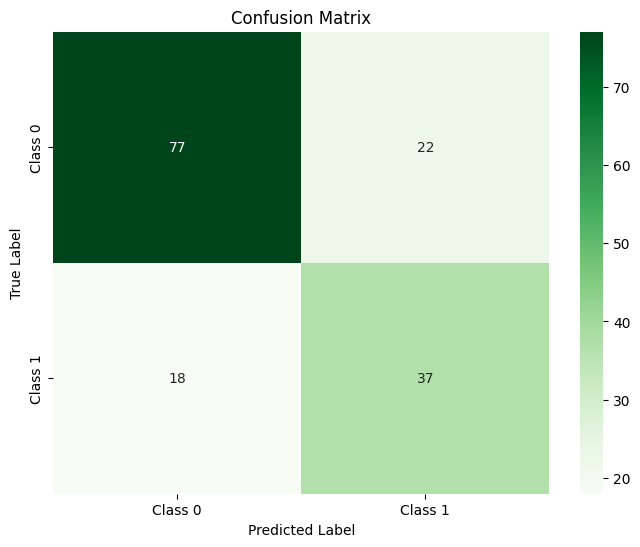

In [42]:
show_confusion_matrix(raw_y_test, raw_y_pred6)

## 3. Улучшение бейзлайна

Выполним препроцессинг данных, визуализируем некоторую информацию и исследуем датасет

In [188]:
df = pd.read_csv('diabetes-dataset-using-many-medical-metrics/diabetes.csv')
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [190]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<ipython-input-191-15c01ed2ed9b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Glucose"])


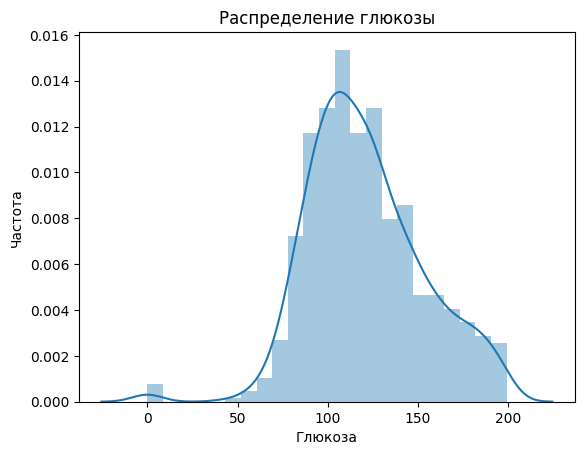

In [191]:
sns.distplot(df["Glucose"])
plt.title("Распределение глюкозы")
plt.xlabel("Глюкоза")
plt.ylabel("Частота")
plt.show()

<ipython-input-192-0fcfaf062007>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BloodPressure"])


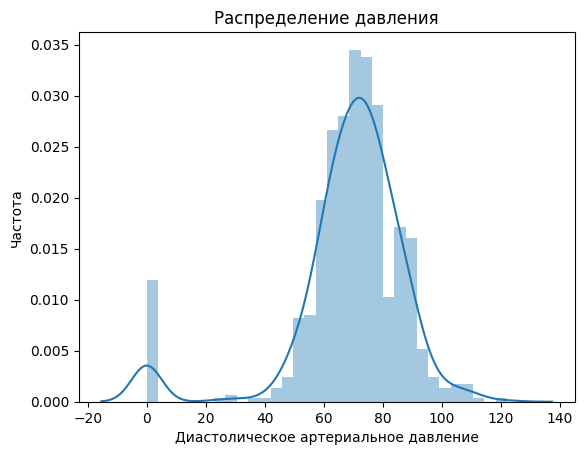

In [192]:
sns.distplot(df["BloodPressure"])
plt.title("Распределение давления")
plt.xlabel("Диастолическое артериальное давление")
plt.ylabel("Частота")
plt.show()

<ipython-input-193-0d7e1abd7859>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


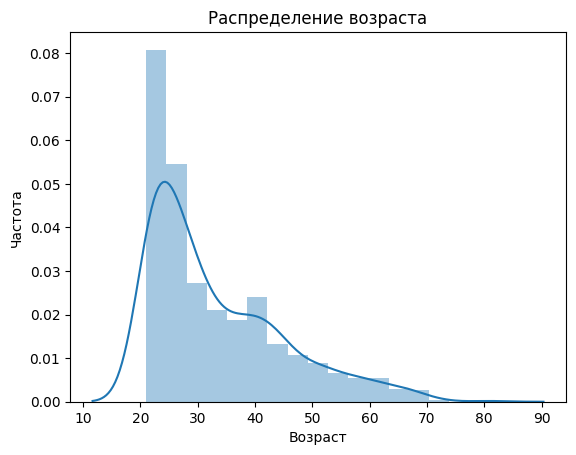

In [193]:
sns.distplot(df["Age"])
plt.title("Распределение возраста")
plt.xlabel("Возраст")
plt.ylabel("Частота")
plt.show()

<ipython-input-195-2b95acdef5a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["BMI"])


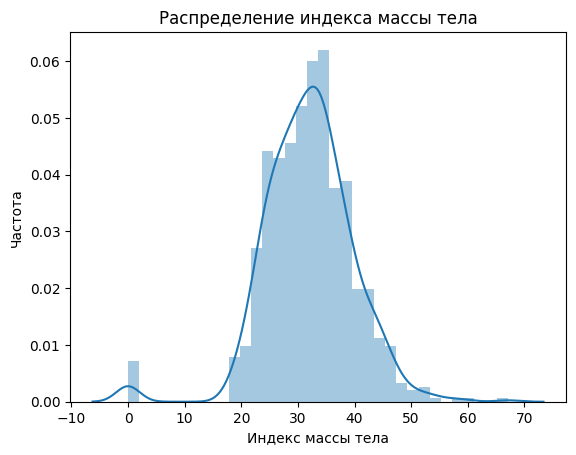

In [195]:
sns.distplot(df["BMI"])
plt.title("Распределение индекса массы тела")
plt.xlabel("Индекс массы тела")
plt.ylabel("Частота")
plt.show()

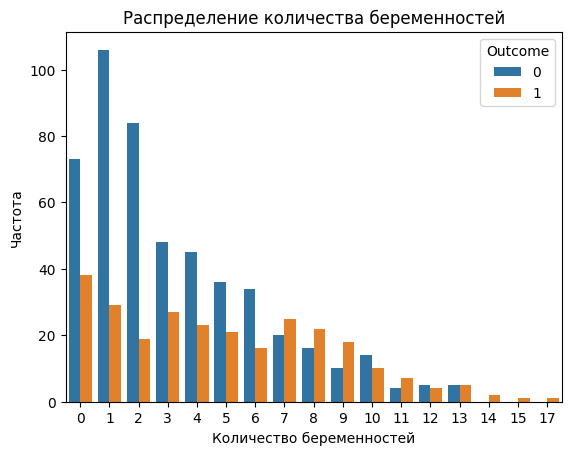

In [196]:
sns.countplot(x='Pregnancies', hue='Outcome', data=df)
plt.title("Распределение количества беременностей")
plt.xlabel("Количество беременностей")
plt.ylabel("Частота")
plt.show()

In [197]:
print(df.SkinThickness.unique())

[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 99]


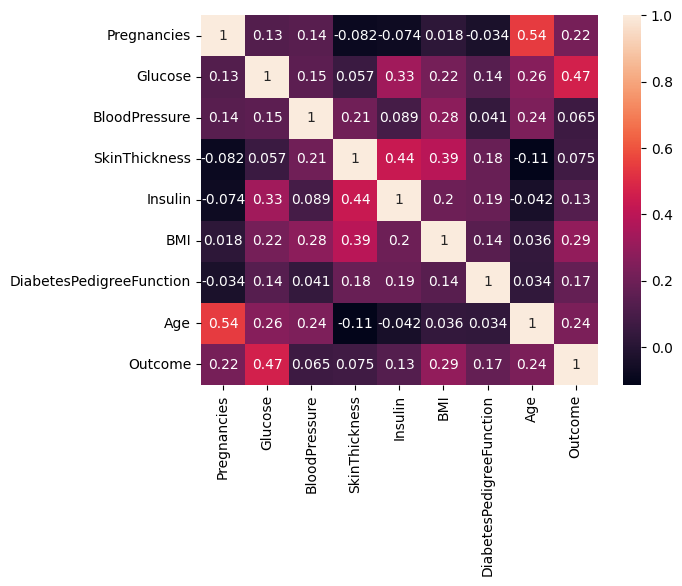

In [198]:
sns.heatmap(df.corr(), annot=True);

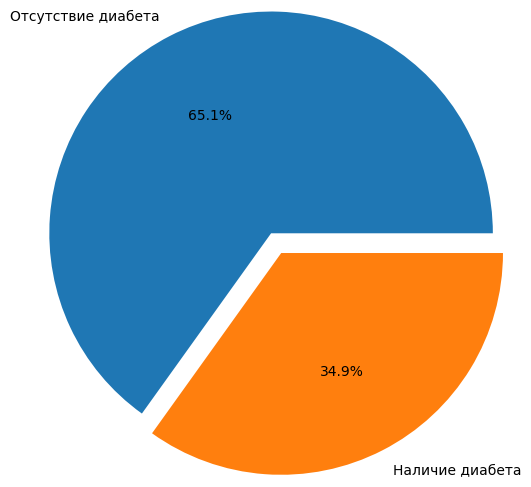

In [199]:
graf = df.groupby('Outcome')['Outcome'].count()
plt.pie(graf, explode=[0.05, 0.1], labels=['Отсутствие диабета', 'Наличие диабета'], radius=1.5, autopct='%1.1f%%');

В результате более глубокого просмотра данных выяснилось, что хоть и нет пустых значений, но в SkinThickness встречаются нулевые данные, что по логике не может соответствовать толщине кожной складки. Поэтому было решено заполнить эти нули средними значениями.

In [200]:
df["SkinThickness"] = df["SkinThickness"].replace(0, df["SkinThickness"].mean())

In [201]:
print(df.SkinThickness.unique())

[35.         29.         20.53645833 23.         32.         45.
 19.         47.         38.         30.         41.         33.
 26.         15.         36.         11.         31.         37.
 42.         25.         18.         24.         39.         27.
 21.         34.         10.         60.         13.         20.
 22.         28.         54.         40.         51.         56.
 14.         17.         50.         44.         12.         46.
 16.          7.         52.         43.         48.          8.
 49.         63.         99.        ]


Выполним нормализацию данных: приведём все признаки к одному масштабу. Это должно позволить модели лучше обучаться.

In [202]:
from sklearn.preprocessing import MinMaxScaler

x = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42, stratify=y)

Также в результате визуализации данных, было замечено, что класс 0 представляет 66,1% набора данных, а класс 1 — 34,9%. Классы не уровновешены. Решим эту проблему

In [204]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [205]:
x_resampled_df = pd.DataFrame(x_resampled, columns=x.columns)

x_resampled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.058824,0.452261,0.508197,0.054348,0.050827,0.405365,0.214347,0.050000
1,0.294118,0.633166,0.639344,0.217391,0.026005,0.441133,0.154142,0.316667
2,0.117647,0.527638,0.475410,0.358696,0.111111,0.520119,0.062767,0.066667
3,0.058824,0.733668,0.459016,0.147135,0.000000,0.442623,0.207515,0.133333
4,0.000000,0.477387,0.524590,0.347826,0.124113,0.664680,0.122972,0.016667
...,...,...,...,...,...,...,...,...
795,0.018647,0.599337,0.704114,0.448565,0.268121,0.700988,0.171375,0.166667
796,0.302493,0.949033,0.516421,0.282609,0.389799,0.467842,0.223014,0.139266
797,0.056290,0.632733,0.594687,0.151706,0.029786,0.413099,0.084547,0.239367
798,0.000000,0.688011,0.499432,0.312779,0.166778,0.514955,0.172318,0.002585


### Обучение моделей с улучшенным бейзлайном
#### KNN

In [206]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_resampled, y_resampled)
y_pred = knn.predict(x_test)

print_evaluation(y_test, y_pred)

Accuracy score: 0.6818181818181818

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       100
           1       0.54      0.67      0.60        54

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       154



#### Логистическая регрессия

In [210]:
logistic_regression = LogisticRegression(max_iter=100000)
logistic_regression.fit(x_resampled, y_resampled)

y_pred2 = logistic_regression.predict(x_test)
print("MSE score:", mean_squared_error(y_test, y_pred2))
print_evaluation(y_test, y_pred2)

MSE score: 0.2597402597402597
Accuracy score: 0.7402597402597403

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



#### Линейная регрессия

In [212]:
linear_regression = LinearRegression()
linear_regression.fit(x_resampled, y_resampled)

y_pred3 = linear_regression.predict(x_test)
print("MSE score:", mean_squared_error(y_test, y_pred3))
print_evaluation(y_test, y_pred3)

MSE score: 0.1809370373315439
Accuracy score: 0.7337662337662337

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       100
           1       0.61      0.69      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.74      0.73      0.74       154



#### Решающее дерево

In [214]:
decision_tree = DecisionTreeClassifier(criterion="entropy", random_state=42)
decision_tree.fit(x_resampled, y_resampled)
y_pred4 = decision_tree.predict(x_test)
print_evaluation(y_test, y_pred4)

Accuracy score: 0.7532467532467533

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



#### Случайный лес

In [215]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(x_resampled, y_resampled)
y_pred5 = random_forest.predict(x_test)
print_evaluation(y_test, y_pred5)

Accuracy score: 0.7337662337662337

              precision    recall  f1-score   support

           0       0.82      0.75      0.79       100
           1       0.60      0.70      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.72       154
weighted avg       0.75      0.73      0.74       154



#### Градиентный бустинг

In [216]:
gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boosting.fit(x_resampled, y_resampled)
y_pred6 = gradient_boosting.predict(x_test)
print_evaluation(y_test, y_pred6)

Accuracy score: 0.7662337662337663

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



## Имплементация алгоритма машинного обучения
### Обучение моделей самостоятельной реализации с исходным бейзлайном
#### KNN

In [239]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class MyKNN:
    def __init__(self, num_neighbors=3):
        self.num_neighbors = num_neighbors

    def fit(self, features, labels):
        self.x_train = np.array(features)
        self.y_train = np.array(labels)

    def predict(self, test_features):
        predictions = []
        features = np.array(test_features, dtype=float)
        for feature in features:
            distances = np.linalg.norm(self.x_train - feature, axis=1)
            nearest_indices = np.argsort(distances)[:self.num_neighbors]
            nearest_labels = self.y_train[nearest_indices]
            predictions.append(np.bincount(nearest_labels).argmax())
        return np.array(predictions)

In [233]:
modelMyKNN = MyKNN(num_neighbors=3)
modelMyKNN.fit(raw_x_train, raw_y_train)
my_raw_y_pred = modelMyKNN.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred)

Accuracy score: 0.6493506493506493

              precision    recall  f1-score   support

           0       0.76      0.66      0.71        99
           1       0.51      0.64      0.56        55

    accuracy                           0.65       154
   macro avg       0.64      0.65      0.64       154
weighted avg       0.67      0.65      0.66       154



#### Логистическая регрессия

In [220]:
class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            linear_model = np.dot(features, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        linear_model = np.dot(test_features, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)

        return [1 if i > 0.5 else 0 for i in y_predicted]

In [221]:
modelMyLogisticRegression = MyLogisticRegression()
modelMyLogisticRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred2 = modelMyLogisticRegression.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred2)

Accuracy score: 0.7142857142857143

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        99
           1       0.63      0.49      0.55        55

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



#### Линейная регрессия

In [222]:
class MyLinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, features, labels):
        n_samples, n_features = features.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.num_iterations):
            y_predicted = np.dot(features, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(features.T, (y_predicted - labels))
            db = (1 / n_samples) * np.sum(y_predicted - labels)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, test_features):
        return np.dot(test_features, self.weights) + self.bias

In [223]:
modelMyLinearRegression = MyLinearRegression()
modelMyLinearRegression.fit(raw_x_train, raw_y_train)
my_raw_y_pred3 = modelMyLinearRegression.predict(raw_x_test)
print_evaluation(raw_y_test, my_raw_y_pred3)

Accuracy score: 0.6428571428571429

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



#### Решающее дерево

In [224]:
class MyDecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    class Node:
        def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
            self.feature = feature
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        unique_classes = np.unique(y)

        if len(unique_classes) == 1 or (self.max_depth is not None and depth >= self.max_depth):
            return self.Node(value=unique_classes[0])

        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return self.Node(value=np.bincount(y).argmax())

        left_indices = X[:, best_feature] < best_threshold
        right_indices = X[:, best_feature] >= best_threshold

        left_node = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_node = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return self.Node(feature=best_feature, threshold=best_threshold, left=left_node, right=right_node)

    def _best_split(self, X, y):
        n_samples, n_features = X.shape
        best_gain = -1
        best_feature, best_threshold = None, None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                gain = self._information_gain(y, y[left_indices], y[right_indices])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold

        return best_feature, best_threshold

    def _information_gain(self, parent, left_child, right_child):
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self._entropy(parent) - (weight_left * self._entropy(left_child) + weight_right * self._entropy(right_child))

    def _entropy(self, y):
        class_labels, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        return -np.sum(probabilities * np.log2(probabilities + 1e-9))

    def predict(self, X):
        return np.array([self._predict_sample(sample, self.tree) for sample in X])

    def _predict_sample(self, sample, node):
        if node.value is not None:
            return node.value
        if sample[node.feature] < node.threshold:
            return self._predict_sample(sample, node.left)
        else:
            return self._predict_sample(sample, node.right)

In [241]:
modelMyDecisionTree = MyDecisionTree()
modelMyDecisionTree.fit(scaler.fit_transform(raw_x_train), raw_y_train)
my_raw_y_pred4 = modelMyDecisionTree.predict(scaler.fit_transform(raw_x_test))
print_evaluation(raw_y_test, my_raw_y_pred4)

Accuracy score: 0.6038961038961039

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        99
           1       0.45      0.47      0.46        55

    accuracy                           0.60       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.60      0.61       154



#### Случайный лес

In [226]:
class MyRandomForest:
    def __init__(self, n_trees=10, max_depth=5, sample_size=0.8):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.sample_size = sample_size
        self.trees = []

    def _bootstrap_sample(self, X, y):
        n_samples = int(len(X) * self.sample_size)
        idxs = np.random.choice(len(X), size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth)
            X_sample, y_sample = self._bootstrap_sample(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def predict(self, X):
        tree_predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.array([np.bincount(pred).argmax() for pred in tree_predictions.T])


In [174]:
modelMyRandomForest = MyRandomForest()
modelMyRandomForest.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred5 = modelMyRandomForest.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred5)

Accuracy score: 0.7662337662337663

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



#### Градиентный бустинг

In [227]:
class MyGradientBoosting:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        self.initial_prediction = np.mean(y)
        y_pred = np.full(y.shape, self.initial_prediction)

        for _ in range(self.n_estimators):
            residuals = y - y_pred

            model = MyDecisionTree(max_depth=self.max_depth)
            model.fit(X, residuals)
            self.models.append(model)

            y_pred += self.learning_rate * model.predict(X)

    def predict(self, X):
        y_pred = np.full(X.shape[0], self.initial_prediction)

        for model in self.models:
            y_pred += self.learning_rate * model.predict(X)

        return y_pred

In [228]:
modelMyGradientBoosting = MyGradientBoosting()
modelMyGradientBoosting.fit(raw_x_train.values, raw_y_train.values)
my_raw_y_pred6 = modelMyGradientBoosting.predict(raw_x_test.values)
print_evaluation(raw_y_test, my_raw_y_pred6)

Accuracy score: 0.6428571428571429

              precision    recall  f1-score   support

           0       0.64      1.00      0.78        99
           1       0.00      0.00      0.00        55

    accuracy                           0.64       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.41      0.64      0.50       154



### Обучение моделей самостоятельной реализации с улучшенным бейзлайном
#### KNN

In [240]:
MyKNN = MyKNN(num_neighbors=3)
MyKNN.fit(x_resampled, y_resampled)
my_y_pred = MyKNN.predict(x_test)
print_evaluation(y_test, my_y_pred)

Accuracy score: 0.6818181818181818

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       100
           1       0.54      0.67      0.60        54

    accuracy                           0.68       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.68      0.69       154



#### Логистическая регрессия

In [128]:
MyLogisticRegression = MyLogisticRegression()
MyLogisticRegression.fit(x_resampled, y_resampled)
my_y_pred2 = MyLogisticRegression.predict(x_test)
print_evaluation(y_test, my_y_pred2)

Accuracy score: 0.7532467532467533

              precision    recall  f1-score   support

           0       0.88      0.72      0.79       100
           1       0.61      0.81      0.70        54

    accuracy                           0.75       154
   macro avg       0.74      0.77      0.74       154
weighted avg       0.78      0.75      0.76       154



#### Линейная регрессия

In [129]:
MyLinearRegression = MyLinearRegression()
MyLinearRegression.fit(x_resampled, y_resampled)
my_y_pred3 = MyLinearRegression.predict(x_test)
print_evaluation(y_test, my_y_pred3)

Accuracy score: 0.7402597402597403

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



#### Решающее дерево

In [153]:
MyDecisionTree = MyDecisionTree()
MyDecisionTree.fit(x_resampled, y_resampled)
my_y_pred4 = MyDecisionTree.predict(x_test)
print_evaluation(y_test, my_y_pred4)

Accuracy score: 0.7272727272727273

              precision    recall  f1-score   support

           0       0.83      0.73      0.78       100
           1       0.59      0.72      0.65        54

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154



#### Случайный лес

In [171]:
MyRandomForest = MyRandomForest()
MyRandomForest.fit(x_resampled, y_resampled)
my_y_pred5 = MyRandomForest.predict(x_test)
print_evaluation(y_test, my_y_pred5)

Accuracy score: 0.7727272727272727

              precision    recall  f1-score   support

           0       0.87      0.77      0.81       100
           1       0.65      0.78      0.71        54

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.78       154



####  Градиентный бустинг

In [186]:
MyGradientBoosting = MyGradientBoosting()
MyGradientBoosting.fit(x_resampled, y_resampled)
my_y_pred6 = MyGradientBoosting.predict(x_test)
print_evaluation(y_test, my_y_pred6)

Accuracy score: 0.6493506493506493

              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



## Выводы

В результате выполнения данного задания мне удалось улучшить бейзлайн, благодаря некоторым приёмам, и реализовать несколько моделей машинного обучения, таких как KNN, логистическую и линейную регрессии, градиентный бустинг, случайный лес и решающее дерево.

Точность, которую показала каждая из реализованных моделей, получилась достаточно хорошей и в некоторых случаях даже превзошла точность модели из библиотеки scikit-learn. Это говорит о том, что можно применять мои модели для решения задач с небольшим или средним по сложности датасетам.
Однако, для более сложных и больших объемов данных лучше использовать оптимизированные решения из sklearn, так как они обеспечивают более высокую производительность и способны автоматически адаптироваться к различным характеристикам данных.